## #1

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

from statsmodels.graphics.api import plot_corr # визуализация корреляционной матрицы
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF # VIF

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warning
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# загрузим данные
df = pd.read_csv('sleep75.csv')

In [9]:
# спецификация модели через формулу
mod = smf.ols(formula='sleep~1+I(totwrk/100)+I(totwrk ** 2/10000)+age+smsa+male', data=df)
# подгонка модели с неробастной оценкой ковариационной матрицы
res = mod.fit()

In [12]:
# Матрица регрессионного дизайна X (первый столбец состоит только из единиц)
# mod.exog
# Для наглядности представим в виде pandsa DataFrame
X = pd.DataFrame(mod.exog, columns=mod.exog_names)
X

,Intercept,I(totwrk / 100),I(totwrk ** 2 / 10000),age,smsa,male
0,1.0,34.38,1181.9844,32.0,0.0,1.0
1,1.0,50.20,2520.0400,31.0,0.0,1.0
2,1.0,28.15,792.4225,44.0,1.0,1.0
3,1.0,37.86,1433.3796,30.0,0.0,0.0
4,1.0,25.80,665.6400,64.0,0.0,1.0
...,...,...,...,...,...,...
701,1.0,20.26,410.4676,45.0,1.0,0.0
702,1.0,6.75,45.5625,34.0,0.0,1.0
703,1.0,18.51,342.6201,37.0,0.0,0.0
704,1.0,19.61,384.5521,54.0,0.0,0.0


In [13]:
# Корреляционная матрица для регрессоров
# Отметим, что нужно исключить первый столбец из единиц
corr_matrix = X.drop(columns='Intercept').corr()
corr_matrix.round(3)

,I(totwrk / 100),I(totwrk ** 2 / 10000),age,smsa,male
I(totwrk / 100),1.000,0.937,-0.050,-0.038,0.376
I(totwrk ** 2 / 10000),0.937,1.000,-0.046,-0.051,0.351
age,-0.050,-0.046,1.000,0.025,0.032
smsa,-0.038,-0.051,0.025,1.000,0.007
male,0.376,0.351,0.032,0.007,1.000


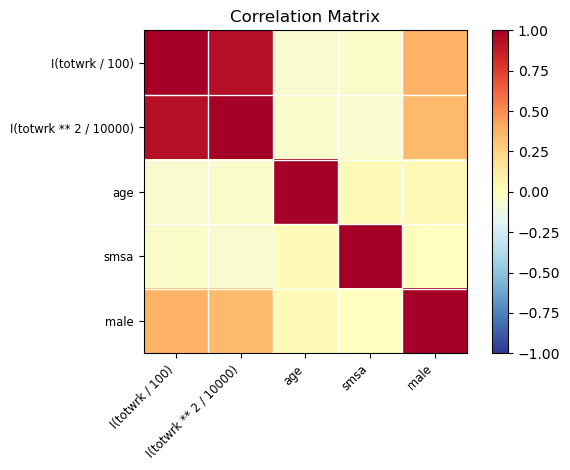

In [14]:
# Визуализация корреляций
plot_corr(corr_matrix, xnames=mod.exog_names[1:], normcolor=True)
plt.show()

<Axes: >

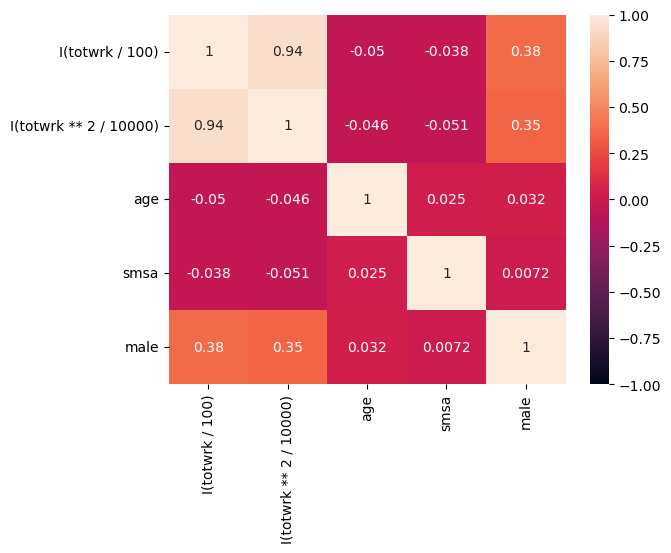

In [15]:
import seaborn as sns

sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True)

In [16]:
# имена экзогенных переменных
mod.exog_names

['Intercept',
 'I(totwrk / 100)',
 'I(totwrk ** 2 / 10000)',
 'age',
 'smsa',
 'male']

In [17]:
VIF(exog=X, exog_idx=1), VIF(exog=X, exog_idx=2), VIF(exog=X, exog_idx=3), VIF(exog=X, exog_idx=4)

(8.370495031825964, 8.19929005215102, 1.005968235588707, 1.004459169895266)

In [18]:
# Напечатаем все VIF
for i in np.arange(1, len(mod.exog_names)):
	print(f'VIF({mod.exog_names[i]})={round(VIF(exog=X, exog_idx=i),3)}')

VIF(I(totwrk / 100))=8.37
VIF(I(totwrk ** 2 / 10000))=8.199
VIF(age)=1.006
VIF(smsa)=1.004
VIF(male)=1.169


In [19]:
# проверим значимость коэффициентов используя P-value
summary_params(res).round(4)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,3428.8048,76.6550,44.7303,0.0000,3278.3035,3579.3062
I(totwrk / 100),-8.1953,4.7894,-1.7111,0.0875,-17.5987,1.2081
I(totwrk ** 2 / 10000),-0.2142,0.1110,-1.9302,0.0540,-0.4320,0.0037
age,2.8167,1.3869,2.0309,0.0426,0.0937,5.5397
smsa,-78.0495,32.0724,-2.4335,0.0152,-141.0190,-15.0799
male,86.6388,34.2000,2.5333,0.0115,19.4920,153.7855


Значимы коэффициенты age, smsa, male